In [38]:
import matplotlib.pyplot as plt
import numpy 
import cv2
import os
import glob
import time
import numpy as np
%matplotlib inline

In [7]:
dpath = '/home/geena/.kaggle/competitions/dogs-vs-cats-redux-kernels-edition/'

In [8]:
os.listdir(dpath)

['sample_submission.csv', 'test.zip', 'train.zip', 'test', 'train']

In [12]:
files = sorted(glob.glob(dpath+'train/*.jpg'))

In [10]:
len(files)

25000

In [13]:
files[0]

'/home/geena/.kaggle/competitions/dogs-vs-cats-redux-kernels-edition/train/cat.0.jpg'

In [14]:
cats = sorted(glob.glob(dpath+'train/cat*.jpg'))
dogs = sorted(glob.glob(dpath+'train/dog*.jpg'))

In [17]:
print(len(cats),len(dogs))

12500 12500


In [24]:
# these images have different image shapes
catimsize = []
dogimsize = []
t0=time.time()
for i in range(len(cats)):
    if (i>0)&(i%100==0):
        print(i)
    catimsize.append(plt.imread(cats[i]).shape)
    dogimsize.append(plt.imread(dogs[i]).shape)
t1=time.time()    

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400


In [25]:
catimsize[:10] # it has all different image sizes

[(374, 500, 3),
 (280, 300, 3),
 (499, 489, 3),
 (499, 403, 3),
 (149, 150, 3),
 (359, 431, 3),
 (374, 500, 3),
 (471, 499, 3),
 (375, 499, 3),
 (239, 320, 3)]

In [28]:
c0 = plt.imread(cats[0]) #read file path to an image, now c0 is a numpy image
print(c0.shape)

(374, 500, 3)


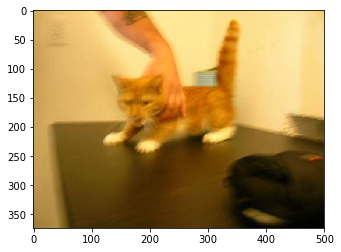

In [32]:
plt.imshow(c0) # visualize a smaple image

In [33]:
cr0 = cv2.resize(c0, (100,100), interpolation = cv2.INTER_AREA) #resize to desired shape (I just chose 100x100 for example)

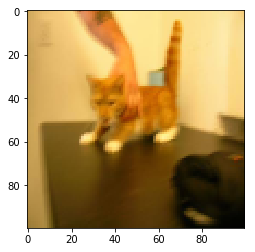

In [34]:
plt.imshow(cr0) #now the cat looks squashed, but seems ok for this one. If ou have a super long picture, maybe better to crop.

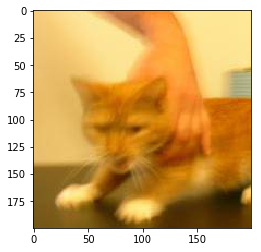

In [35]:
cc0 = c0[50:250, 100:300] # cropping
plt.imshow(cc0)

In [ ]:
# see more: https://www.pyimagesearch.com/2014/01/20/basic-image-manipulations-in-python-and-opencv-resizing-scaling-rotating-and-cropping/

In [36]:
#let's create X and Y
def rescale(im):
    return cv2.resize(im, (100,100), interpolation = cv2.INTER_AREA)

X=[]
for cat in cats:
    X.append(rescale(plt.imread(cat)))

for dog in dogs:
    X.append(rescale(plt.imread(dog)))   


In [39]:
#Since they are in order, I can make Y easily, but you can use different algorithm to create the label
y = np.array(list(np.ones(len(cats)))+list(np.zeros(len(dogs)))) #I assigned 1 for cats and 0 for dogs, but you can choose the other way

In [41]:
X =np.array(X) 
print(X.shape, y.shape)

(25000, 100, 100, 3) (25000,)


In [44]:
# encode the y to categorical
from keras.utils import to_categorical
Y = to_categorical(y)
print(Y.shape)

Using TensorFlow backend.
/home/geena/anaconda3/envs/DLK2/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


(25000, 2)


In [47]:
# now you want to shuffle your training data. It's good to use index shuffling.
ind = np.array(list(range(25000)))
np.random.shuffle(ind)
print(ind[:10]) #check the shuffling

[17181 12804  1383 24656 21205  4654 14284  3840 21017 19045]


In [48]:
#shuffle your data
Xs = X[ind]
Yx = Y[ind]

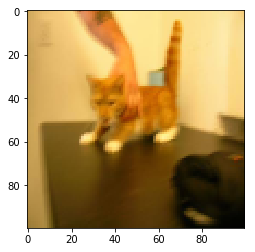

In [49]:
plt.imshow(X[0])

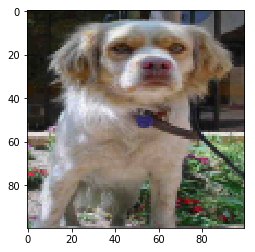

In [50]:
plt.imshow(Xs[0]) #seems shuffled

In [51]:
print(Y[0], Yx[0]) #seems consistent

[ 0.  1.] [ 1.  0.]


In [52]:
print(Xs.dtype)
print(Xs.max()) #max pixel value

uint8
255


In [53]:
#simple normalization, but you can use different methods if you want
Xs = (Xs-127.5)/255

In [55]:
print(Xs.dtype)
print(Xs.mean())
print(Xs.max())
print(Xs.min())
print(Xs.nbytes/10**9) #size of the matrix in GB

float64
-0.0465499259346
0.5
-0.5
6.0


In [57]:
# I want to save my disk space and change the dtype to float32
Xs = Xs.astype('float32')
print(Xs.dtype)
print(Xs.nbytes/10**9) # now I have half the size

float32
3.0


In [58]:
# now save to hdf5 (since it's huge I'd like to use hdf5)
# also hdf5 is a hierarchical data which lets you assign tags/groups or subgroups to your data
import h5py
with h5py.File('traindata.hdf5','w') as f:
    f.create_dataset('X', data=Xs)
    f.create_dataset('Y', data=Y)

In [59]:
#reading the file
with h5py.File('traindata.hdf5','r') as f:
    X_train = f['X'][()] #the [()] means load all data
    # but you may load a part of data if you want for any reason
    X_part = f['X'][:100] #read first 100 samples

In [60]:
print(X_train.shape, X_part.shape)

(25000, 100, 100, 3) (100, 100, 100, 3)
